<a href="https://colab.research.google.com/github/SarthoPramanik1075/Machine-Learning-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv("heart_disease.csv") #https://www.kaggle.com/datasets/nprottay/heart-disease-info?select=heart_disease.csv
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [ ]:
df.sample(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
6226,80.0,Male,138.0,204.0,Low,Yes,No,Yes,18.241296,Yes,...,Yes,Medium,High,8.634044,Medium,123.0,110.0,2.851339,9.767025,No
6277,40.0,Female,137.0,153.0,Low,No,Yes,Yes,37.782934,No,...,No,High,Low,5.741367,Low,255.0,117.0,6.281734,17.006846,No
2612,25.0,Male,169.0,161.0,High,Yes,Yes,Yes,22.696796,Yes,...,Yes,Low,Low,7.554987,Low,177.0,92.0,12.479577,14.455388,No
6543,42.0,Male,140.0,292.0,Medium,Yes,No,No,19.204806,Yes,...,Yes,Low,High,9.736080,Medium,362.0,148.0,2.291721,19.506200,No
5058,40.0,Male,170.0,195.0,High,No,No,Yes,29.374491,Yes,...,Yes,High,High,8.633300,High,286.0,112.0,8.284626,11.759325,No
583,56.0,Female,136.0,246.0,High,Yes,No,Yes,26.469068,No,...,Yes,High,High,8.993332,Medium,214.0,151.0,0.384662,17.264853,No
6793,31.0,Male,139.0,247.0,Low,Yes,Yes,No,29.920868,No,...,Yes,NaN,High,9.419485,Low,332.0,96.0,6.179789,18.699646,No
3813,35.0,Female,128.0,244.0,High,No,No,No,34.210387,No,...,Yes,High,Low,6.929175,Medium,199.0,118.0,2.457273,8.579791,No
4492,34.0,Female,156.0,239.0,Medium,Yes,No,No,25.043660,No,...,No,Low,High,5.584797,High,201.0,112.0,3.220570,8.382167,No
6643,27.0,Female,126.0,186.0,Low,Yes,No,No,18.679036,No,...,No,Medium,Low,5.320130,Medium,390.0,156.0,3.581210,7.337073,No


In [ ]:
print("Shape: ", df.shape)

Shape:  (10000, 21)


In [ ]:
print("Info: ",(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.30,18.19,18.0,34.00,49.00,65.00,80.0
Blood Pressure,9981.0,149.76,17.57,120.0,134.00,150.00,165.00,180.0
Cholesterol Level,9970.0,225.43,43.58,150.0,187.00,226.00,263.00,300.0
BMI,9978.0,29.08,6.31,18.0,23.66,29.08,34.52,40.0
Sleep Hours,9975.0,6.99,1.75,4.0,5.45,7.00,8.53,10.0
Triglyceride Level,9974.0,250.73,87.07,100.0,176.00,250.00,326.00,400.0
Fasting Blood Sugar,9978.0,120.14,23.58,80.0,99.00,120.00,141.00,160.0
CRP Level,9974.0,7.47,4.34,0.0,3.67,7.47,11.26,15.0
Homocysteine Level,9980.0,12.46,4.32,5.0,8.72,12.41,16.14,20.0


In [ ]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
#!pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df, title="Data Profiling Report", explorative=True)
# profile.to_file("report.html")


In [ ]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns
target_cols = 'Heart Disease Status'

print("Numerical cols: ", num_cols)
print("Categorical cols: ", cat_cols)
print("Target cols: ", target_cols)

Numerical cols:  Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Categorical cols:  Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')
Target cols:  Heart Disease Status


In [ ]:
for c in cat_cols:
  print((c), df[c].unique())

Gender ['Male' 'Female' nan]
Exercise Habits ['High' 'Low' 'Medium' nan]
Smoking ['Yes' 'No' nan]
Family Heart Disease ['Yes' 'No' nan]
Diabetes ['No' 'Yes' nan]
High Blood Pressure ['Yes' 'No' nan]
Low HDL Cholesterol ['Yes' 'No' nan]
High LDL Cholesterol ['No' 'Yes' nan]
Alcohol Consumption ['High' 'Medium' 'Low' nan]
Stress Level ['Medium' 'High' 'Low' nan]
Sugar Consumption ['Medium' 'Low' 'High' nan]
Heart Disease Status ['No' 'Yes']


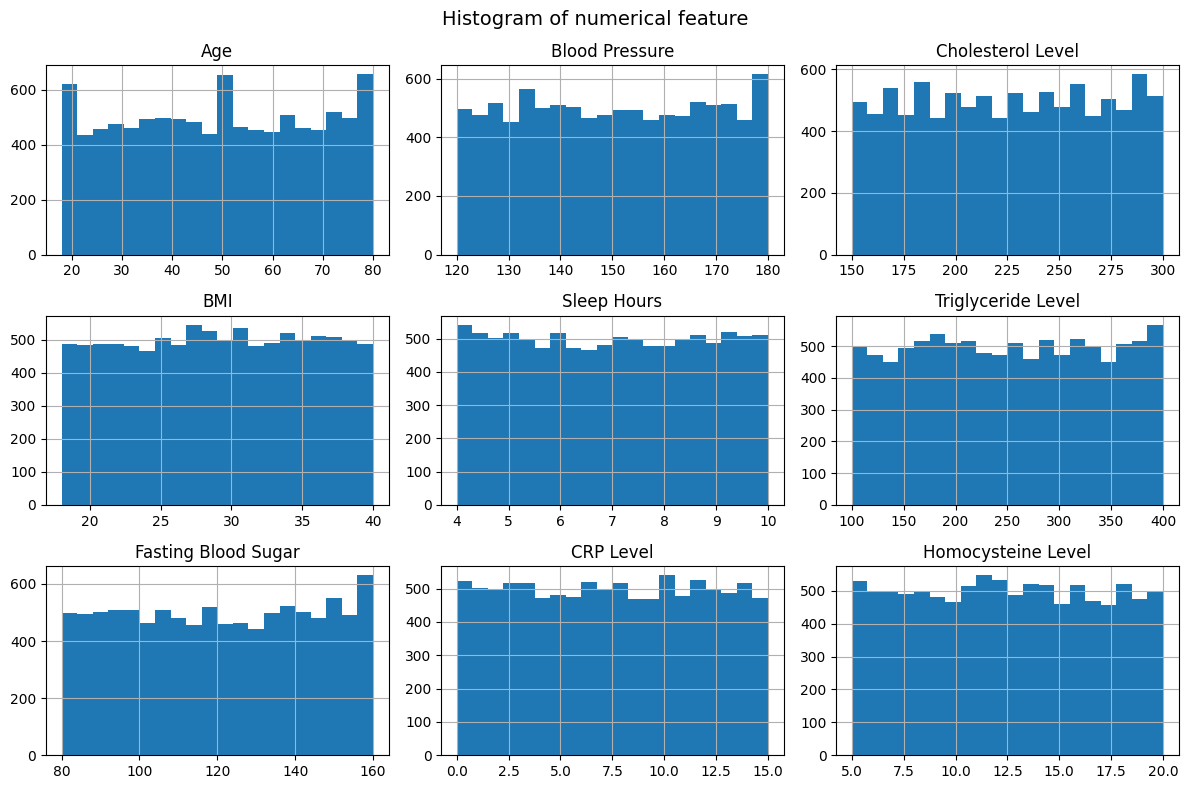

In [ ]:
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histogram of numerical feature", fontsize=14)
plt.tight_layout()

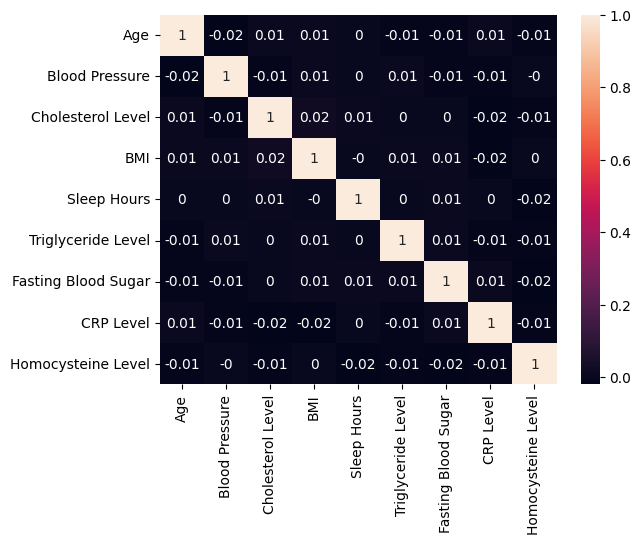

In [ ]:
sns.heatmap(df[num_cols].corr().round(2), annot=True)
plt.show()


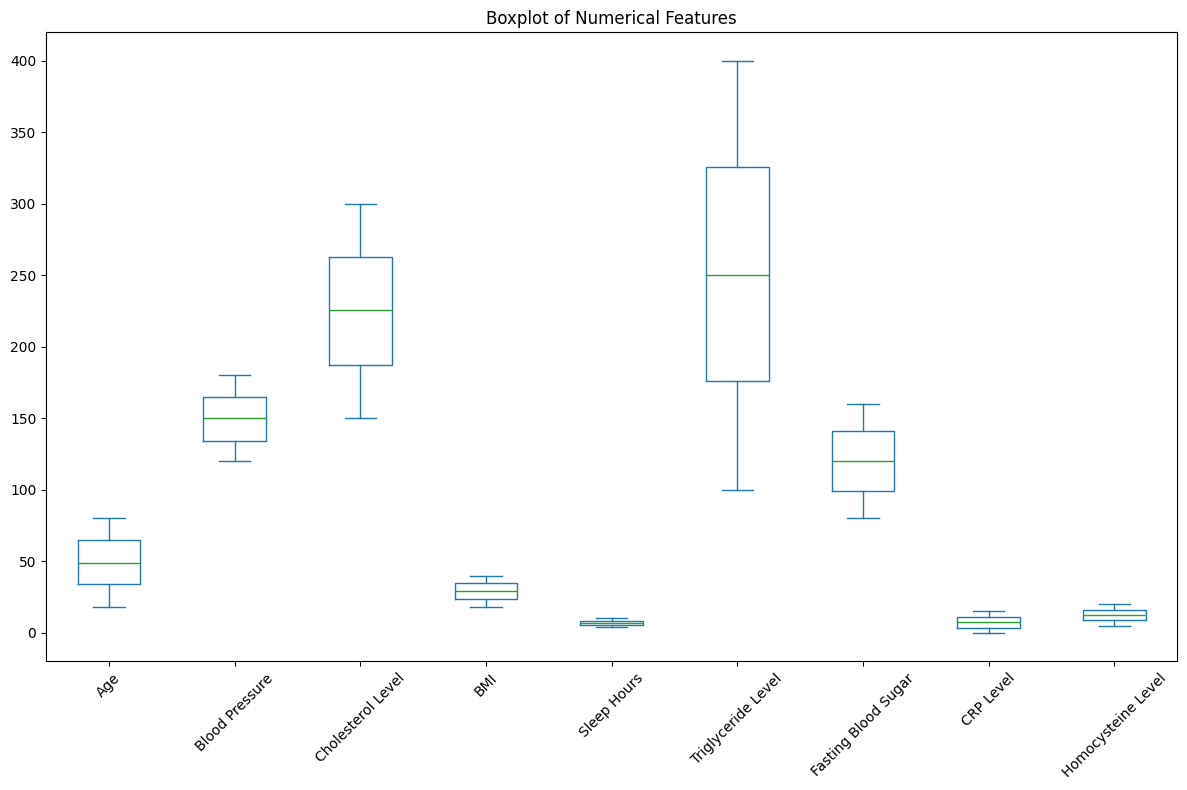

In [ ]:
df[num_cols].plot(kind="box", figsize=(12,8))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# mising value handling

In [ ]:
df.drop(columns=['Alcohol Consumption'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Stress Level          9978 non-null   object 
 13  Sleep Hours           9975 non-null   float64
 14  Sugar Consumption     9970 non-null   object 
 15  Triglyceride Level  

In [ ]:
df[num_cols].skew()


,0
Age,-0.006789
Blood Pressure,0.013907
Cholesterol Level,-0.007120
BMI,-0.021342
Sleep Hours,0.000172
Triglyceride Level,0.006142
Fasting Blood Sugar,-0.008915
CRP Level,-0.004069
Homocysteine Level,0.007886


In [ ]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5003
Female,4978


# ml pipeline

In [ ]:
X = df.drop(columns=['Heart Disease Status'])
Y = df['Heart Disease Status']

In [ ]:
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns
target_cols = 'Heart Disease Status'

print("Numerical cols: ", num_cols)
print("Categorical cols: ", cat_cols)
print("Target cols: ", target_cols)

Numerical cols:  Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Categorical cols:  Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption'],
      dtype='object')
Target cols:  Heart Disease Status


In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
Y.value_counts()

,count
Heart Disease Status,
No,8000
Yes,2000


In [ ]:
y_test.value_counts()

,count
Heart Disease Status,
No,1613
Yes,387


# model training

In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()

In [ ]:
models_to_run = {
    "logistic_regression": lr,
    "decision_tree": dt,
    "random_forest": rf,
    "knn": knn,
    "gradient_boosting": gb
}

In [ ]:
res = []

for name,model in models_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])
  # train
  pipe.fit(x_train,y_train)

  # predict
  y_pred = pipe.predict(x_test)

  # evaulation
  res.append({
      'model': name,
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, pos_label='Yes'),
      'recall': recall_score(y_test, y_pred, pos_label='Yes'),
      'f1': f1_score(y_test, y_pred, pos_label='Yes'),
      'confusion_matrix': confusion_matrix(y_test, y_pred)
  })

result = pd.DataFrame(res).sort_values(by='recall',ascending=False)
result

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,accuracy,precision,recall,f1,confusion_matrix
0,logistic_regression,0.4985,0.178497,0.441860,0.254275,"[[826, 787], [216, 171]]"
1,decision_tree,0.6905,0.211443,0.219638,0.215463,"[[1296, 317], [302, 85]]"
3,knn,0.7595,0.126984,0.041344,0.062378,"[[1503, 110], [371, 16]]"
2,random_forest,0.8065,0.000000,0.000000,0.000000,"[[1613, 0], [387, 0]]"
4,gradient_boosting,0.8065,0.000000,0.000000,0.000000,"[[1613, 0], [387, 0]]"


In [ ]:
model_name = 'logistic_regression'
model = models_to_run[model_name]


In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [ ]:
y_scores = pipe.decision_function(x_test)
y_test_bin = y_test.map({'No': 0, 'Yes': 1})


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_bin, y_scores)
auc_score = roc_auc_score(y_test_bin, y_scores)

print("ROC-AUC:", auc_score)


ROC-AUC: 0.48200265606802606


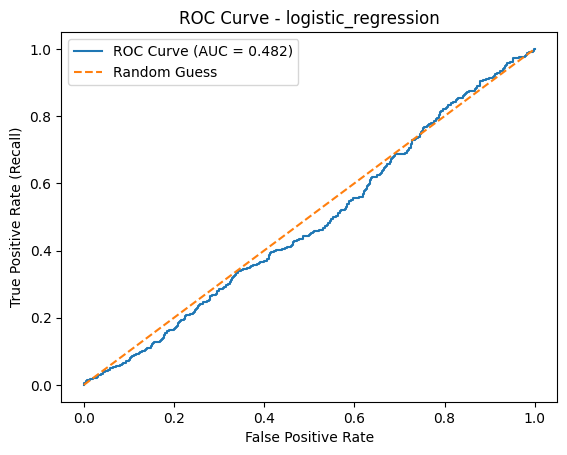

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title(f'ROC Curve - {model_name}')
plt.legend()
plt.show()


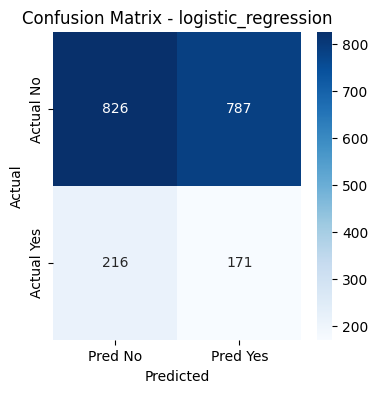

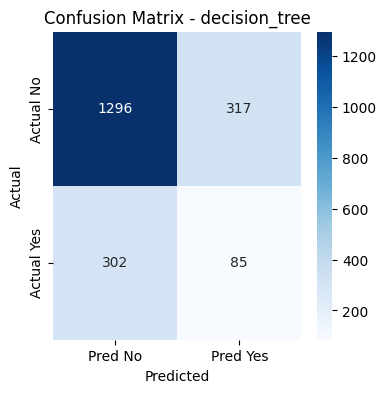

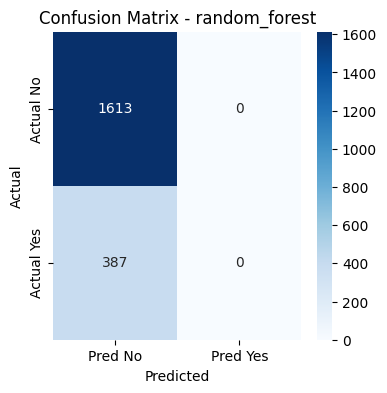

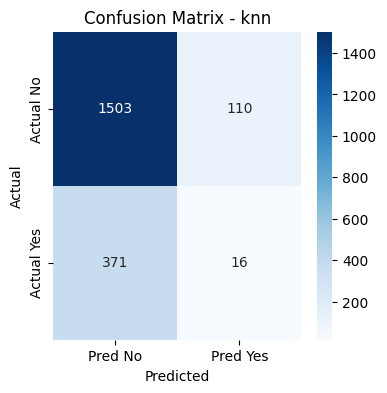

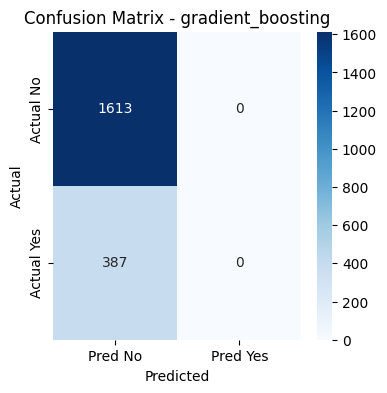

In [ ]:

for name, model in models_to_run.items():
    pipe = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])
    # train
    pipe.fit(x_train,y_train)

    # predict
    y_pred = pipe.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Pred No', 'Pred Yes'],
        yticklabels=['Actual No', 'Actual Yes']
    )
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()